# Download and set requirements, do not touch this code and run these cells once using $ctrl + enter$

In [1]:
!pip install sklearn
!pip install matplotlib

In [3]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

In [4]:
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['No Default', 'Default']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

def plot_feature_importance(data_x, clf):
    df = pd.DataFrame({'variables': data_x.columns, 'importance': clf.feature_importances_})
    df_imp = df.sort_values(by = ['importance'], ascending=False).head(10).iloc[::-1]
    
    plt.barh(df_imp.variables, df_imp.importance)
    plt.xlabel("Feature importance")
    plt.title("Most important features found in the Random Forest")

def read_data():
    data = pd.read_csv(data_path)
    data_x = data.drop(['loan_status'], axis = 1)
    data_y = data['loan_status']
    data_x = pd.get_dummies(data_x)
    return data_x, data_y

def run_settings(settings):
    # Perform data preparations

    data_x, data_y = read_data()
    train_x, test_x, train_y, test_y = train_test_split(data_x, data_y, train_size=settings['Split ratio'], stratify=data_y, random_state=42)
    
    # Create and fit random forest
    random_forest =  RandomForestClassifier(n_estimators=settings['Number of trees'], max_features=settings['Maximum features'], random_state=42)
    random_forest.fit(train_x, train_y)

    #Generate predictions and plot confusion matrix
    pred_y = random_forest.predict_proba(test_x)

    plot_feature_importance(data_x, random_forest)
    plt.show()
    return test_y, pred_y[:,1]


# Insert the path to your data below

In [7]:
data_path = 

# Set the settings below and run the cell below

In [8]:
settings = {'Number of trees': 10, 
            'Split ratio' : 0.5,
            'Maximum features' : 1}

# Run the cell below to compute the predictions and make an feature importance plot

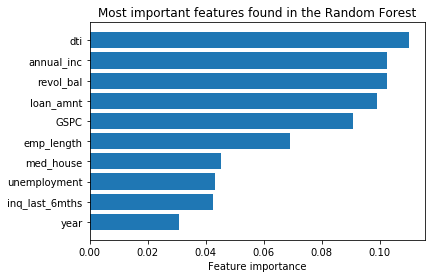

In [9]:
# Put in data frame and make thresholds adaptable
test_y, pred_y = run_settings(settings)

# Use the cells below to compute your performance metric, note that some performance metrics, e.g. accuracy, requires you to round the probabilities to a classification  